# PC lab: classification

## 1 Introduction

In a binary classification setting, we are interested in assigning an observation 𝐱 to one of two possible classes, denoted by 𝑦. For example, maybe we would like to tell if a patient has a particular disease (y = 1) or not (y = 0), given certain symptoms 𝐱, in other words, we want to model $P(y|\mathbf{x})$, also called the *class posterior* or the *class-membership probability*. Two main approaches exist to model this probability: either directly using *discriminative models* or using *generative models*, which first model the joint probability $P(\mathbf{x},y)$ and obtain the class posterior using Bayes' rule.

### 1.1 Logistic regression

**Logistic regression** (LR) is the most fundamental example of a **discriminative** model. Just like linear regression, LR is a linear model. However, LR does not model the mean of a continuous outcome, but the logarithm of the [odds](https://en.wikipedia.org/wiki/Odds) of the probability $P(X)$:

\begin{equation}
log \frac{P(y|\mathbf{x})}{1-P(y|\mathbf{x})} = w_{0}x_{0} + w_{1}x_{1} + ... + w_{p}x_{p} = \mathbf{w^Tx}
\end{equation}

In practice,  we are really interested in the probability $P(y|\mathbf{x})$ and not in the odds of $P(y|\mathbf{x})$. To obtain this from the previous equation, we apply the *logistic function* (otherwise called a *sigmoid* function):

\begin{equation}
\phi(z) = \frac{1}{1 + e^{-z}} = \frac{e^{z}}{1+e^{z}}
\end{equation}

Applying this function on both sides of the LR equation, we get a model for $P(y|\mathbf{x})$ as follows:

\begin{equation}
P(y|\mathbf{x}) = \phi(\mathbf{w^Tx}) = \frac{1}{1 + e^{-\mathbf{w^Tx}}}
\end{equation}

If we want to classify a data point $\mathbf{x}$, we can calculate the probability of it being class $y$ with the above equation. A final classification is then made by assigning it to the class if the probability $P(y|\mathbf{x})$ exceeds a certain threshold. A typical threshold is 0.5.

![sigmoid](https://qph.fs.quoracdn.net/main-qimg-6ab7369356c16f17ac39fbb83d5d56c1)

<div class="alert alert-success">
<b> THOUGHT EXERCISE: What would happen to our predictions when we would choose a lower threshold, let's say 0.2? How would this affect the accuracy of our predictions? Can you think of a situation where we would want to do this? </b>
</div>

#### 1.1.1 OPTIONAL EXTRA: Training a LR model: cross-entropy loss

Now that we know the logistic regression model to predict the probability of belonging to a certain class, all that remains is the question of how to find the weights of the model on a given set of training data. As always, this is the problem of minimizing a loss function to find an optimal set of weights. Where we used the mean squared error (MSE) for linear regression, we will use the **cross-entropy** loss function for LR. Minimizing the binary cross-entropy loss is equivalent to minimizing the negative log-likelihood of the data under a binomial distribution:

\begin{equation}
l_{log}^{i} = \frac{1}{n}\sum\limits_{i=1}^{n}-y_{i}log(P(y_i|\mathbf{x}_i))-(1-y_i)log(1-P(y_i|\mathbf{x}_i))
\end{equation}

Where $y_i$ is the class of data point $i$ and $p(\mathbf{x}_i)$ is the class-membership probability predicted by logistic regression for the observation $\mathbf{x}_i$. If we look at the cross-entropy loss **for a single data point** $l_{log}^{i}$, we can break it down in two parts:

\begin{equation}
l_{log}^{i} = 
\begin{cases}
   -log(P(y_i|\mathbf{x}_i)) & \text{if} \ y_i = 1\\    
   -log(1-P(y_i|\mathbf{x}_i)) & \text{if} \ y_i = 0
\end{cases}
\end{equation}

Or even more generally, the cross-entropy can be written as the log probability of predicting the correct class:

\begin{equation}
l_{log}^{i} = -log(P(\mathrm{correct} y_i|\mathbf{x}_i))
\end{equation}

From this, it should be clear that the cross-entropy loss will be larger for smaller values of $P(y_i|\mathbf{x}_i))$ if $y_i = 1$, and vice versa. If we visualize the cross-entropy loss for these two cases:

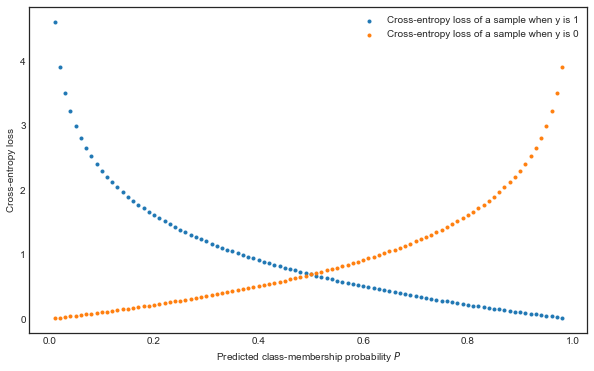

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

p = np.arange(0.01,0.99,0.01) # Generate a range of predicted probabilities between zero and 1
l_0 = -np.log(p)  # cross-entropy loss if y = 1
l_1 = -np.log(1-p)

# Plot them
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(p,l_0, marker='.')
ax.scatter(p, l_1, marker='.')
ax.set_xlabel('Predicted class-membership probability $P$')
ax.set_ylabel('Cross-entropy loss')
ax.legend(['Cross-entropy loss of a sample when y is 1',
           'Cross-entropy loss of a sample when y is 0'])
plt.show()

#### 1.1.2 OPTIONAL EXTRA: Training a LR model: gradient descent

For linear regression, the solutions to the normal equations provide a convenient analytical solution to obtain the optimal set of model weights $\mathbf{w}$ on a set of training data. There is no such solution to find the optimal weights for a logistic regression model, so instead an optimization algorithm such as **gradient descent** is used to train a LR model.

Gradient descent is an iterative optimization algorithm that searches for the optimum of an objective function by making small changes to a set of optimization variables. Gradient descent (and its more complex variants) are widely used in machine learning to find the optimal set of model weights that minimize a certain loss function. Especially when there is no analytical solution for the weights available like for linear regression.

Generally, gradient descent uses the **gradient of the loss function with respect to the model weights** to perform updates to those weights in each iteration. At iteration $k+1$, the algoritm computes the gradient of a loss function $J(\mathbf{w})$ evaluated in the training data. Then, it performs an update to the current parameter values that is relative to the gradient multiplied with the learning rate $\gamma$, which is a constant:

\begin{equation}
\mathbf{w}_{k+1} = \mathbf{w}_{k} - \gamma\nabla{J(\mathbf{w}_{k})}
\end{equation}

Initially, the weights are often initialized with random draws from some distribution. The algorithm continues to do updates, until it converges or until some stopping criterion is reached.

In order to perform gradient descent to find the weights of a logistic regression model, we need to compute the gradient of the loss function with respect to the model parameters. Recall that, for a single data point, the cross-entropy loss function was as follows:

\begin{equation}
l_{log}^{i}(\mathbf{w}) = -y_{i}log(P(y_i|\mathbf{x}_i))-(1-y_i)log(1-P(y_i|\mathbf{x}_i)))
\end{equation}

Where $P(y_i|\mathbf{x}_i))$ is nothing else than the weighted sum of the inputs squashed through the sigmoid function:

\begin{equation}
P(y_i|\mathbf{x}_i)) = \phi(w_{0}x_{0i} + w_{1}x_{1i} + ... + w_{p}x_{pi})
\end{equation}

Before going on, let's first calculate the partial derivative of the sigmoid function:


\begin{equation}
\frac{\partial}{\partial z} \phi(z) = \frac{\partial}{\partial z} \frac{1}{1+e^{-z}} = \frac{e^{-z}}{(1+e^{-z})^2}
\end{equation}

We can rewrite this as follows:

\begin{equation}
\frac{e^{-z}}{(1+e^{-z})^2} = \frac{1 +e^{-z} -1}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \Big( 1 - \frac{1}{1+e^{-z}}\Big) = \phi(z)(1 - \phi(z))
\end{equation}

With this result and by applying the chain rule, we can compute the partial derivative of the loss function with respect to the weight $w_j$. We will use the symbol $z$ to denote the weighted sum of the features (i.e., the input for the logistic function) and drop the subscript $i$ for clarity:

\begin{equation}
\frac{\partial l_{log}(\mathbf{w})}{\partial w_j} = \frac{\partial}{\partial w_j} \Big(-ylog(\phi(z))-(1-y)log(1-\phi(z)) \Big) \\ = \Big(  \frac{-y}{\phi(z)} + \frac{1-y}{1-\phi(z)}  \Big)\frac{\partial}{\partial w_j}\phi(z) \\ = \Big(  \frac{-y}{\phi(z)} + \frac{1-y}{1-\phi(z)}  \Big) \phi(z)(1-\phi(z))\frac{\partial}{\partial w_j}z
\end{equation}

Since $z = w_{0}x_{0} + w_{1}x_{1} + ... + w_{p}x_{p}$, $\frac{\partial}{\partial w_j}z$ is nothing more than $x_j$, so we can rewrite the above as:

\begin{equation}
\frac{\partial l_{log}(\mathbf{w})}{\partial w_j} = \Big( -y(1-\phi(z) + (1-y)\phi(z))\Big)x_j \\ = \big(  -y + \phi(z) \big)x_j = \big( \phi(z) - y \big)x_j
\end{equation}

With this partial derivative of the loss w.r.t $w_j$, we can write the update rule of the gradient descent algorithm for the $j^{th}$ weight:
    
\begin{equation}
w_{j,k+1} = w_{j,k} - \gamma(\phi(z_k)-y)x_{j}
\end{equation}

In other words, the algorithm will each time perform an update to the weight $w_{j}$ that is in proportion to the difference between the predicted probability of class membership in the previous iteration and the actual class. Makes sense! The entire gradient is simply the vector that contains the partial derivatives with respect to the entire weight vector $\mathbf{w}$, and in reality gradient descent acts on $\mathbf{w}$ and not on an individual weight $w_j$. Also, the gradient is typically not calculated for one data point, but evaluated over the entire training data set (unless the training set is prohibitively large, in that case mini-batch gradient descent is used). 

In practice, software packages such as [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegressionscikit-learn) do this optimization under the hood, so there is no need to implement it manually each time we want to use logistic regression.

### 1.2 Linear discriminant analysis

In contrast to the (discriminative) logistic regression model, linear discriminative analysis (LDA) is a **generative** model. Generative models are called as they are because they specify the class-conditional densities $P(\mathbf{x}|y)$, which allows to generate new observations $\mathbf{x}$ for a class $y$: for a given class $y$, we can sample from the distribution $P(\mathbf{x}|y)$. 

The main assumption in LDA is that the data in each class is assumed to follow a multivariate Gaussian distribution. Furthermore, the assumption is made that the (co)variance within and between predictor variables is the same for all the classes. As such, only a limited number of parameters have to be estimated from the data to fully specify the class-conditional distributions: in the multivariate case, we need to estimate the class-specific mean vectors $\mathbf{\mu_{k}}$ and the common covariance matrix $\Sigma$. In the case of just one predictor (feature), this simplifies to estimating the mean of $x$ within each class and the variance $\sigma^2$. The priors $p(y=k)$ are simply estimated from the data by calculating the proportion of training instances in each class.

![lda](https://d3i71xaburhd42.cloudfront.net/1ab8ea71fbef3b55b69e142897fadf43b3269463/1-Figure1-1.png)

Once the class-conditional densities $P(\mathbf{x}|y)$ are modeled using LDA, predictions à la logistic regression $P(y|\mathbf{x})$ can be obtained by using Bayes' rule:

\begin{equation}
P(y=k|\mathbf{x}) = \frac{P(\mathbf{x}|y=k)P(y)}{P(\mathbf{x})} = \frac{P(\mathbf{x}|y=k)P(y=k)}{\sum_{l=1}^{K}P(\mathbf{x}|y=l)P(y=l)}
\end{equation}

where all probabilities $P(\mathbf{x}|y=l)$ is obtained by the LDA model and all probabilities $P(y=l)$ are simply observed from the class frequency in the dataset (e.g.: 70% of the training dataset samples belongs to class $l$ so: $P(y=l) = 0.70$)

## 1.3 Classification metrics

As you may imagine, the classification accuracy (the percentage of samples predicted correctly), may not always be the most appropriate metric to evaluate the performance of a classifier. In particular, the following two scenarios seem to require a different approach: 

* In some applications, we want to avoid false negatives at the cost of more false positives. For instance, we want to make sure that we do not falsely predict that a patient is healthy when in reality he has a disease. When we allow for more false positives, the classification accuracy will go down. 
* When the data is very imbalanced, a *null classifier* that always predicts the same class will achieve a high classification accuracy.

A first step to get some more insight in the performance of a classifier is to create a confusion matrix, which gives an overview of the kind of mistakes we have made during classification. A confusion matrix might look like this:

![confusion](https://miro.medium.com/max/1000/1*fxiTNIgOyvAombPJx5KGeA.png)

The concepts of *specificity* and *sensitivity* are better suited in the previous example scenarios. These are *class-specific* metrics: the sensitivity is the fraction of (true) positives that is correctly identified (as positive). The specificity is the fraction of (true negatives) that is correctly classified (as negative). A classifier might predict nearly every sample as positive, hence obtaining a high sensitivity but a very low specificity. One way to change this is to change the threshold for classification: by selecting a higher threshold, we will predict more samples as negatives, hence the sensitivity will go down because we will now predict some positives as being negative. However, the specificity will improve, because we now only predict samples as positive if the model outputs a higher probability for it being positive.

![sensvsspec](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/341px-Sensitivity_and_specificity_1.01.svg.png)

The apparent trade-off between sensitivity and specificity is summarized by the receiver operating characteristic (ROC) curve. A ROC curve is a plot of the true positive rate (sensitivity) versus the false positive rate (one minus the specificity) for various thresholds. It typically looks like this:

![ROC](https://miro.medium.com/max/724/1*eFmiqjRi5MmZwfaPsy82yg.png)

It illustrates the trade-off between sensitivity and specificity as we vary the threshold. A good measure to evaluate a classifier is the **area under the ROC curve (AUROC or AUC)**. A classifier that does random guesses has an AUC of 0.5 (dotted line in the plot), so if we design a classifier for a certain problem we want it to achieve an AUC higher than 0.5. 

Check this [blog](https://datascienceplus.com/interpretation-of-the-auc/) to read a bit more considering the interpretation of the AUROC. 

## 2 Exercises

### 2.1 Breast cancer dataset

In this set of exercises, we will use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The dataset contains information on the disease status of 569 breast cancer patients: they were either diagnosed with a malign (status M) or with a benign (status B) tumor. 

For each patient, the dataset also contains 30 features that represent statistics of the cell nuclei present in images taken after [fine needle aspirate tissue samples](https://en.wikipedia.org/wiki/Fine-needle_aspiration). These 30 features are the mean, standard deviation and the maximum of 10 measurements on the cell nuclei:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

**Based on these feature of the cell nuclei, we would like to predict whether a patient has a malign or a benign breast cancer tumor.** Let's download and read in the data:

In [2]:
!wget https://raw.githubusercontent.com/gdewael/teaching/main/UGAIN2021/wdbc.data

--2021-09-23 11:23:20--  https://raw.githubusercontent.com/gdewael/teaching/main/UGAIN2021/wdbc.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [text/plain]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K  --.-KB/s    in 0.04s   

2021-09-23 11:23:20 (3.20 MB/s) - ‘wdbc.data’ saved [124103/124103]



In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('./wdbc.data', header=None, index_col=0, names=['Patient ID', 'status'] + list(np.arange(1,31,1)))
status = data['status']
data.head()

,status,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Patient ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


First, let's look at the distribution of the disease status:

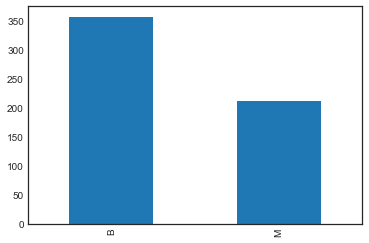

In [4]:
pd.value_counts(data['status']).plot(kind='bar');

There are about 350 benign cases and roughly 200 malign cases. This is a fairly balanced dataset.

<div class="alert alert-success">

<b>THOUGHT EXERCISE: Suppose that the dataset was unbalanced, with 525 B cases and only 25 M cases. Would you still use accuracy to evaluate the model?</b>
</div>

In these exercises, we will use the [scikit-learn](https://scikit-learn.org/stable/) implementations of [LR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html). In order to fit models, we will first need to encode the labels 'Benign' (B) and 'Malign' (M) to a binary encoder:

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(status)
encoder.classes_  # 'B' will become class 0, 'M' will become class 1

array(['B', 'M'], dtype=object)

In [6]:
y = encoder.transform(status)
x = data.drop('status', axis=1).values # Drop the disease status from the dataframe, convert to numpy array
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

<div class="alert alert-success">

<b>EXERCISE: Using scikit-learn, split the data in a 80% training and a 20% test set. Fit a logistic regression model and evaluate training and testing accuracy. </b>
</div>

Use [this method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for train-test splitting and [this implementation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to perform logistic regression. Accuracy can be computed by using the score() method of each model.

In [7]:
# ** solution **
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

print(LRmodel.score(X_train, y_train))
print(LRmodel.score(X_test, y_test))

# ** solution **

0.9516483516483516
0.9210526315789473


/home/gaetan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-success">

<b>EXERCISE: Now do the same with LDA. Do you split your dataset again in a new random training and testing split? Think about fair evaluation/comparison between the two models.</b>
</div>

Use [this implementation](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) for LDA.

In [8]:
# ** solution **
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train, y_train)

print(LDAmodel.score(X_train, y_train))
print(LDAmodel.score(X_test, y_test))
# ** solution **

0.9648351648351648
0.9385964912280702


Depending on your data split, LDA or LR will perform better. The model that we prefer is hence determined by a random data splitting, a behavior that we do not want. One way to avoid this is to perform [cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/), this is however, out-of-scope for these exercises.


<div class="alert alert-success">
<b>EXERCISE: Use your preferred (LDA or LR) model to predict the class probabilities $P(y|\mathbf{x})$ and the classes for the training data. Use the predict_proba() method to generate the predicted probabilities. Take note of the output shape of predict_proba(), what do the columns mean? Use the code below to plot the two against each other. Which data points are most likely to be misclassified?</b>
</div>

In [9]:
# ** solution **
predicted_class_probabilities = LDAmodel.predict_proba(X_train)[:,1]
predicted_classes = LDAmodel.predict(X_train)

#** solution **

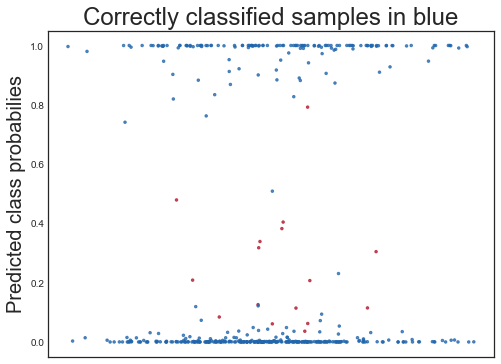

In [10]:
misclassified = predicted_classes !=  y_train

colors = ['#b2182b' if wrong else '#2166ac' for wrong in misclassified ]
fig, ax = plt.subplots(figsize=(8,6))
test_jitter = np.random.normal(scale=0.1, size=len(predicted_class_probabilities))
ax.scatter(test_jitter, predicted_class_probabilities,
           marker='.', s=25, color=colors, alpha=0.75)
ax.get_xaxis().set_ticks([]);
ax.set_ylabel('Predicted class probabilies').set_fontsize(20)
ax.set_title('Correctly classified samples in blue', size=24)
plt.show()

Clearly, the misclassified points are those points where the predicted probability of class membership is rather close to 0.5.

<div class="alert alert-success">
<b>EXERCISE: Use the predicted class probabilities from the previous exercise to compute the ROC AUC score on the test dataset. Then, use the code below to plot the ROC curves of both models.</b>
</div>

In [11]:
# plot the roc curves
from sklearn.metrics import roc_curve, roc_auc_score

# Use test data!
#########
predicted_class_probabilities_LDA = LDAmodel.predict_proba(X_test)[:,1]
predicted_class_probabilities_LR = LRmodel.predict_proba(X_test)[:,1]

AUC_LDA = roc_auc_score(y_test, predicted_class_probabilities_LDA)
AUC_LR = roc_auc_score(y_test, predicted_class_probabilities_LR)

##############

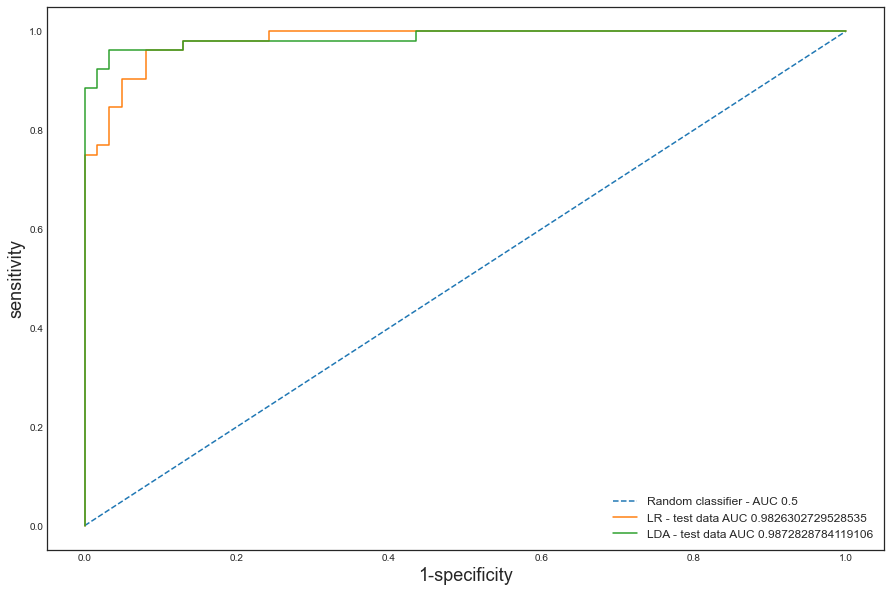

In [12]:
roc_LDA = roc_curve(y_test, predicted_class_probabilities_LDA)
roc_LR = roc_curve(y_test, predicted_class_probabilities_LR)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot([0, 1], [0, 1], '--')
ax.plot(roc_LR[0], roc_LR[1])
ax.plot(roc_LDA[0], roc_LDA[1])
ax.set_xlabel('1-specificity').set_fontsize(18)
ax.set_ylabel('sensitivity').set_fontsize(18)


ax.legend(['Random classifier - AUC 0.5',
           'LR - test data AUC {}'.format(AUC_LR),
           'LDA - test data AUC {}'.format(AUC_LDA)],
         fontsize='large')
plt.show()

### 2.2 OPTIONAL EXTRA: Data preprocessing for text inputs (example with DNA)

Since machine learning models expect numbers as inputs, not words, we need to do some preprocessing first to make them compatible with ML models. A very common feature representation for text sequences is called the **Bag of Words**. It consists of listing all the possible tokens that might occur in your text. A token might be one word, or a combination of two or multiple words. The feature representation is then a matrix with the count of the tokens for each text instance. The simplest transformation is to just look at the counts of individual tokens: the 1-grams. However, it might be interesting to count combinations of two or more words as well. Consider the following example, where we have 2 example input sample sentences:


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

data = ['this is real life',
       'is this real life']
print('data:\n', data[0], '\n', data[1])
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,2))

analyze = vectorizer.build_analyzer()
print('vocabulary:\n', analyze(data[0]))
      
features = vectorizer.fit_transform(data)
print('final feature representation:\n', features.toarray())

data:
 this is real life 
 is this real life
vocabulary:
 ['this', 'is', 'real', 'life', 'this is', 'is real', 'real life']
final feature representation:
 [[1 1 0 1 1 1 1 1 0]
 [1 0 1 1 1 1 1 0 1]]


Note that by default, the vectorizer returns the features as a sparse array: in most applications, each row of the feature matrix will contain a lot of zeros. For this exercise, you can convert it to a regular numpy array with the ```toarray()``` method.

If we restrict ourselves to look at 1-grams, both sentences above are transformed into the exact same feature representation. However, suppose we want to do sentiment analysis and classify whether a sentence contains a question or not. Then it might be useful to look at bigrams as well, as above

In [14]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
analyze = vectorizer.build_analyzer()
analyze(data[0])
features = vectorizer.fit_transform(data)
print('Only 1-grams:')
print('final feature representation:\n', features.toarray())

Only 1-grams:
final feature representation:
 [[1 1 1 1]
 [1 1 1 1]]


When we consider bigrams, the feature representation for both sentences is no longer exactly the same. Maybe the features that represent 'this is' and 'is this' could be helpful here.

Still the bag-of-words features completely ignores where every n-gram was in the sentence. Another way to take this into account is to assign $v$ dummy features for every location in the sentence, with $v$ being the vocabulary size (number of possible different words). Every first, second, third and fourth word get assigned 1 feature for every possible word in that location (out of 4 possible words in the vocabulary). This is called [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Natural_language_processing)
This requires the sentences to be all of the same length, for example, 4 words as in the 2 sentences above.

In [15]:
data_splitwords = [sentence.split(' ') for sentence in data]
print('data splitted by words:')
print(data_splitwords)
vocab = list(set([word for sentence in data_splitwords for word in sentence]))
print('vocabulary:')
print(vocab)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',
                    categories=[vocab]*len(data_splitwords[0]))

features = enc.fit_transform(data_splitwords)
print('resulting feature representation:')
print(features.toarray())

data splitted by words:
[['this', 'is', 'real', 'life'], ['is', 'this', 'real', 'life']]
vocabulary:
['this', 'life', 'real', 'is']
resulting feature representation:
[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]


If it is not immediately clear what the features mean in this example: the first four features represent which word is the first word in each sentence. The first and sentence has as first word 'this', this is the last word in the vocabulary, so of the first four features, the last is given by $1$. The second sentence has 'is' as the first word, which is the second word in the vocabulary, for this reason, the second column of the first four features is given by $1$ for this sentence. Both sentences have the same last two words 'real life', it can be seen that the last 8 features for both sentences are identical.

Armed with these encoding schemes, we can tackle a real problem. **DNA sequences** as inputs are peculiar because they are essentially text: following an alphabet containing only A, T, C or G. We will use data from a published [study](https://bmcbiol.biomedcentral.com/articles/10.1186/1741-7007-12-4) about sigma factors in E. coli. Some biological background information for those interested:

> The binding region of the transcription unit,  commonly called the promoter region, is known to play a key role  in the transcription rate of downstream genes. In Eubacteria, the sigma factor ($\sigma$) binds with the RNA  polymerase subunit ($\alpha\beta\beta'\omega$) to create RNA polymerase. Being part of the RNA polymerase holoenzyme, the sigma element acts as the connection between RNA polymerase and DNA. Depending on the sigma factor bound to the transcription unit, different binding regions of the enzyme with the DNA are observed. The data represents specific DNA regions of the *E. coli* genome to which one or more sigma factors bind.

In less-biological-jargon words: certain molecules called sigma factors control activity of genes, they do so by binding to the DNA close to the gene. If we can predict for an input DNA sequence if such a molecule will bind, we gain an understanding in the biological function of those genes and molecules.

The dataset contains 4724 DNA sequences. For each sequence, we have information on five target variables, each representing 5 sigma factors. Each time, the outcome is binary, indicating whether the sigma factor binds to the sequence or not. This is a **multi-label** problem, where an input can belong to any (multiple at once) of the classes, as opposed to only one possible class for each sample in multi-class. For simplicity in this exercise, we will focus only on one class: RPOD.

In [16]:
!wget https://raw.githubusercontent.com/gdewael/teaching/main/UGAIN2021/promotor_list_exp_growth.csv
promotor_data = pd.read_csv('./promotor_list_exp_growth.csv', index_col=0)
promotor_data.head(20)

X = np.array(promotor_data.PROBE_SEQUENCE)
y = promotor_data['RPOD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

--2021-09-23 11:23:21--  https://raw.githubusercontent.com/gdewael/teaching/main/UGAIN2021/promotor_list_exp_growth.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315440 (308K) [text/plain]
Saving to: ‘promotor_list_exp_growth.csv’

promotor_list_exp_g 100%[===================>] 308.05K  --.-KB/s    in 0.08s   

2021-09-23 11:23:22 (3.94 MB/s) - ‘promotor_list_exp_growth.csv’ saved [315440/315440]



<div class="alert alert-success">

<b> OPTIONAL EXTRA EXERCISE: 
Use one of the encoding schemes to preprocess the DNA data. Construct a model and evaluate performance on the test set. Play around with different preprocessing values, and keep testing performances. What types of preprocessing lead to good performance for this dataset? In what cases are we overfitting? Think about fair evaluation: if we keep testing out configurations and evaluating on the test set, is our final test performance estimate fair? We can solve this by keeping an additional data split separate: training, validation and testing. Then we test different hyperparameters (different ways of preprocessing) on the validation set. We don't touch the test set until we have our final model. This is the only fair way of evaluating. For more information, see this [link](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets).</b>
</div></b>
</div>

In [17]:
# N-GRAM features:

vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,5))
      
X_train1 = vectorizer.fit_transform(X_train).toarray()
X_test1 = vectorizer.transform(X_test).toarray()

LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train1, y_train)

y_pred = LDAmodel.predict(X_test1)
y_pred_train = LDAmodel.predict(X_train1)

print(roc_auc_score(y_test, y_pred), roc_auc_score(y_train, y_pred_train))


# LOCATION features:

X_train2 = np.array([list(x) for x in X_train])
X_test2 = np.array([list(x) for x in X_test])

enc = OneHotEncoder(categories=[['A', 'T', 'C', 'G']]*len(X_train2[0]))

X_train2 = enc.fit_transform(X_train2).toarray()
X_test2 = enc.fit_transform(X_test2).toarray()

LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train2, y_train)

y_pred = LDAmodel.predict(X_test2)
y_pred_train = LDAmodel.predict(X_train2)

print(roc_auc_score(y_test, y_pred), roc_auc_score(y_train, y_pred_train))

0.5784724527049452 0.8140549048447562
0.6786010620643878 0.6831724991479974


### 2.3 OPTIONAL EXTRA: Multiclass classification

Some classifiers inherently support multiclass classification as part of their design, for example, in LDA, the class-conditional density $P(\mathbf{x}|y)$ is modeled for every class $y$ and can be converted to predictions using Bayes' rule. For logistic regression, a natural extension to the multi-class case is [multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression). Check out the [scikit-learn page on multiclass prediction](https://scikit-learn.org/stable/modules/multiclass.html) for more information. In principle, any classifier can be made multiclass using following methods:

#### One-versus-one classification

One-versus-one classification is another approach to a multiclass classification problem. For a K-class problem, the strategy consists of training $\frac{K(K-1)}{2}$ classifiers. Each of these classifiers much learn to distinguish to classes. One the classifiers are trained, a voting scheme is applied to make a prediction for an unseen data point: each classifier has to decide between two possible classes. The final predicted class is that class that gets the largest number of votes. 

#### One-versus-all classification

In one-versus-all (OvA) classification (also called one-versus-rest), a single classifier is trained per class, with the samples of that class as positive samples and all other samples as negatives. The strategy proceeds as follows for a K-class classification problem:

**Inputs:**
* a classification algorithm L (learner)
* feature matrix $\mathbf{X}$
* label vector y where $y_i \in {1,...,K}$


**Procedure:**
for each k in {1,...,K}:
* construct a new label vector z where $z_i$ is 1 if $y_i$ = k and 0 otherwise
* train L on $\mathbf{X}$ to obtain a classifier $f_k$. The classifier should return class probabilities and not hard labels.

**Returns**
A list of trained classifiers $f_k$ for each  k in {1,...,K}

To make predictions for a new sample $\mathbf{x}$, the $k$ classifiers are applied to $\mathbf{x}$ and the final predicted label is the label that is predicted with the highest confidence (probability):

$\hat{y} = \underset{k \in {1,...,K}}{\mathrm{argmax}} \, f_k(\mathbf{x})$

Let's simulate a toy dataset with three classes and two features, and split it in training and test data:

In [18]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=1000, centers= [[-2.5, 0], [0, 1], [3.5, -1]], random_state=42)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

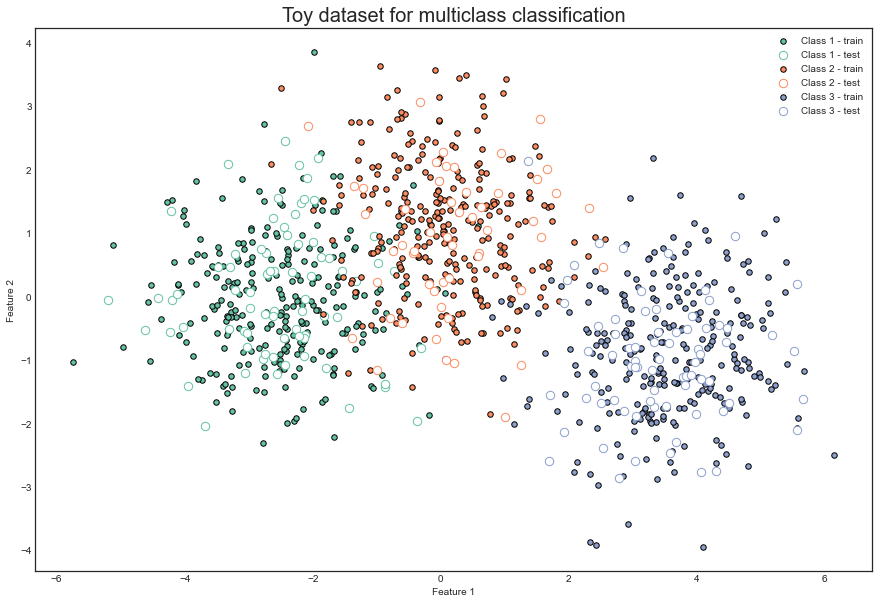

In [19]:
# Make the plot
fig, ax = plt.subplots(figsize=(15,10))
colors=['#66c2a5', '#fc8d62', '#8da0cb']
for i, color in enumerate(colors):
    idx_train = np.where(y_train==i)
    idx_test = np.where(y_test==i)
    plt.scatter(X_train[idx_train,0], X_train[idx_train,1], c=color, edgecolor='black', s=30)
    plt.scatter(X_test[idx_test,0], X_test[idx_test, 1],c='white', edgecolor=color, s=70)
    
ax.legend(['Class 1 - train',
           'Class 1 - test',
           'Class 2 - train',
           'Class 2 - test',
           'Class 3 - train',
           'Class 3 - test']);

ax.set_xlabel('Feature 1');
ax.set_ylabel('Feature 2');
ax.set_title('Toy dataset for multiclass classification').set_fontsize(20);

<div class="alert alert-success">
<b>OPTIONAL EXTRA EXERCISE: Look again at the documentation of LDA and Logistic Regression. What options do you need to specify to train these models on a multi-class problem? Train a model on this toy dataset</b>
</div>

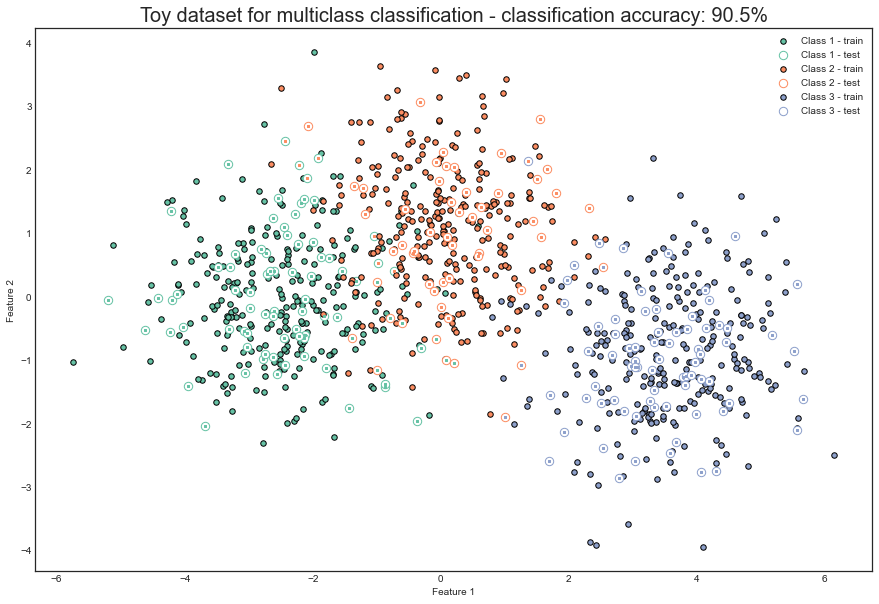

In [20]:
LRmodel = LogisticRegression(multi_class='ovr')
LRmodel.fit(X_train, y_train)

predicted_classes = LRmodel.predict(X_test)
predicted_probas = LRmodel.predict_proba(X_test)

classification_accuracy = np.round(np.mean(y_test == predicted_classes)*100,2)

# Visualize the predictions

fig, ax = plt.subplots(figsize=(15,10))
colors=['#66c2a5', '#fc8d62', '#8da0cb']

for i, color in enumerate(colors):
    idx_train = np.where(y_train==i)
    idx_test = np.where(y_test==i)
    
    plt.scatter(X_train[idx_train,0], X_train[idx_train,1], c=color, edgecolor='black', s=30)
    plt.scatter(X_test[idx_test,0], X_test[idx_test, 1],c='white', edgecolor=color, s=70)
        
ax.legend(['Class 1 - train',
           'Class 1 - test',
           'Class 2 - train',
           'Class 2 - test',
           'Class 3 - train',
           'Class 3 - test']);

# add predictions
for i, color in enumerate(colors):
    idx_predicted = np.where(predicted_classes==i)
    plt.scatter(X_test[idx_predicted,0], X_test[idx_predicted,1], c=color, marker='s', s=2)

ax.set_xlabel('Feature 1');
ax.set_ylabel('Feature 2');
ax.set_title('Toy dataset for multiclass classification - classification accuracy: {}%'.format(classification_accuracy)).set_fontsize(20);